<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados** 

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [1]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup
import requests
from requests.exceptions import HTTPError

def crawl_website(url: str) -> str:

  try:
    resposta = requests.get(url)
    resposta.raise_for_status()
  except HTTPError as exc:
    print(exc)
  else:
    return resposta.text

URL = 'https://static.lms.ebaconline.com.br/content-files/8c8d1912-fa5e-4612-b7f6-568301a125bc/original.xml'

conteudo = crawl_website(url=URL)
with open(file='estado-bruto.xml', mode='w', encoding='utf8') as arquivo:
  arquivo.write(conteudo)
  
fonte = BeautifulSoup(open('estado-bruto.xml', mode='r'), 'lxml')

In [2]:
# visualize os resultados

fonte


<?xml version="1.0" encoding="utf-8" ?><html><body><estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla

In [3]:
from traitlets.config.configurable import SingletonConfigurable
# manipule os dados

import xml.etree.ElementTree as ET
import pandas as pd

estado = fonte.find_all('nome')
estados = list(map(lambda x: x.get_text(), estado))

regiao = fonte.find_all('regiao')
regioes = list(map(lambda x: x.get_text(),regiao))

sigla = fonte.find_all('sigla')
siglas = list(map(lambda x: x.get_text(),sigla))

tabela = []
for x,y,z in zip(estados, siglas, regioes):
  tabela.append([x,y,z])


In [4]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;
import csv

#NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'
header = [
  'estado',
  'sigla',
  'regiao'
]

with open(file= './estados-limpo.csv', mode= 'w', encoding= 'utf8') as arquivo:
  arquivo_csv = csv.writer(arquivo)
  arquivo_csv.writerow(header)
  arquivo_csv.writerows(tabela)

# continue o codigo aqui

### **1.2. Cidades** 

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [8]:
# ler o arquivo cidades-bruto.csv
import csv
import pandas as pd

df = pd.DataFrame(pd.read_csv('cidades-bruto.csv'))

df

,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...
...,...,...,...,...,...,...,...,...,...,...,...,...
5561,vw_pib_percapita.fid-4514e25a_17aaa325034_-eba,5254,SANTA CATARINA,Campo Erê,2010.0,1.876289e+05,9737,19269.679688,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.024131281087385 -26.361357...
5562,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb9,2749,PARANÁ,Planalto,2010.0,1.385535e+05,13983,9908.709961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.61882711231503 -25.6460599...
5563,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb8,3779,SÃO PAULO,Guararapes,2010.0,5.320191e+05,29639,17949.970703,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-50.70271677275949 -21.0257124...
5564,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb7,617,RIO GRANDE DO SUL,Barra do Guarita,2010.0,2.198064e+04,3067,7166.819824,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-53.778785810369236 -27.152703...


In [9]:
# visualize os resultados
#estado;cidade;populacao;pib;pib_percapita

df_filtro = df.loc[df['Censo']>=2010]
df_selecao = df_filtro[['UF','nome','PIB','Pop_est_2009','PIB_percapita']]
df_selecao


,UF,nome,PIB,Pop_est_2009,PIB_percapita
0,BAHIA,Tremedal,5.788399e+04,18433,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4.572388e+04,4000,11430.969727
2,ESPIRITO SANTO,Vitória,1.978263e+07,320156,61790.589844
3,MINAS GERAIS,Jacutinga,2.478160e+05,21424,11567.209961
4,PIAUÍ,Nazária,2.095138e+04,7895,2653.750000
...,...,...,...,...,...
5561,SANTA CATARINA,Campo Erê,1.876289e+05,9737,19269.679688
5562,PARANÁ,Planalto,1.385535e+05,13983,9908.709961
5563,SÃO PAULO,Guararapes,5.320191e+05,29639,17949.970703
5564,RIO GRANDE DO SUL,Barra do Guarita,2.198064e+04,3067,7166.819824


In [10]:
# manipule os dados

df_selecao.columns = ['estado','cidade','populacao','pib','pib_percapita']
df_selecao

# continue o codigo aqui

,estado,cidade,populacao,pib,pib_percapita
0,BAHIA,Tremedal,5.788399e+04,18433,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4.572388e+04,4000,11430.969727
2,ESPIRITO SANTO,Vitória,1.978263e+07,320156,61790.589844
3,MINAS GERAIS,Jacutinga,2.478160e+05,21424,11567.209961
4,PIAUÍ,Nazária,2.095138e+04,7895,2653.750000
...,...,...,...,...,...
5561,SANTA CATARINA,Campo Erê,1.876289e+05,9737,19269.679688
5562,PARANÁ,Planalto,1.385535e+05,13983,9908.709961
5563,SÃO PAULO,Guararapes,5.320191e+05,29639,17949.970703
5564,RIO GRANDE DO SUL,Barra do Guarita,2.198064e+04,3067,7166.819824


In [15]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;
#NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'

df_selecao.to_csv('cidades-limpo.csv')
# continue o codigo aqui

### **1.3. Brasil** 

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-bruto.csv` com os dados do arquivo `cidades-bruto.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [29]:
# solução do exercício 1.3
estados_df = pd.DataFrame(pd.read_csv('estados-limpo.csv'))
cidades_df = pd.DataFrame(pd.read_csv('cidades-limpo.csv'))

combinacao = pd.merge(left=cidades_df,right=estados_df,on='estado',how='outer')
combinacao.to_csv('brasil.csv')


---

## 2\. Data Analytics

### **2.1. DataFrame** 

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [28]:
# solução do exercício 2.1

brasil_df = pd.DataFrame(pd.read_csv('brasil.csv'))

brasil_df


,Unnamed: 0,Unnamed: 0.1,estado,cidade,populacao,pib,pib_percapita,sigla,regiao
0,0,0.0,BAHIA,Tremedal,57883.992188,18433.0,3140.239990,BA,NORDESTE
1,1,25.0,BAHIA,Maetinga,23558.447266,7884.0,2988.129883,BA,NORDESTE
2,2,36.0,BAHIA,Ibirapuã,74997.406250,7893.0,9501.759766,BA,NORDESTE
3,3,42.0,BAHIA,Governador Mangabeira,92903.820312,20668.0,4495.060059,BA,NORDESTE
4,4,46.0,BAHIA,Ibititá,62366.886719,19410.0,3213.129883,BA,NORDESTE
...,...,...,...,...,...,...,...,...,...
5560,5560,NaN,PARAIBA,NaN,NaN,NaN,NaN,PB,NORDESTE
5561,5561,NaN,PARANA,NaN,NaN,NaN,NaN,PR,SUL
5562,5562,NaN,PIAUI,NaN,NaN,NaN,NaN,PI,NORDESTE
5563,5563,NaN,RONDONIA,NaN,NaN,NaN,NaN,RO,NORTE


### **2.2. Analise** 

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [30]:

filtro_populacao = brasil_df[['cidade','populacao']]
top_10_cidade = filtro_populacao.sort_values(by=['populacao'],ascending=False)

top_10_cidade.head(n=10)

,cidade,populacao
3271,São Paulo,389317152.0
4504,Rio de Janeiro,175739344.0
5554,Brasília,131487264.0
4849,Curitiba,45762420.0
1735,Belo Horizonte,44595204.0
3720,Manaus,40486108.0
500,Porto Alegre,37787912.0
44,Salvador,32824228.0
3223,Guarulhos,32473828.0
4221,Fortaleza,31789186.0


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [31]:
# código para responder a pergunta

filtro_ne = brasil_df.loc[brasil_df['regiao']=='NORDESTE']
cidades_ne = filtro_ne.sort_values(by=['pib_percapita'])

cidades_ne.head(n=5)

,Unnamed: 0,Unnamed: 0.1,estado,cidade,populacao,pib,pib_percapita,sigla,regiao
362,362,4735.0,BAHIA,Caetanos,30036.105469,12307.0,2440.570068,BA,NORDESTE
369,369,4847.0,BAHIA,Novo Triunfo,36864.132812,14763.0,2497.060059,BA,NORDESTE
260,260,3539.0,BAHIA,Matina,33801.074219,13245.0,2551.989990,BA,NORDESTE
5152,5152,1568.0,ALAGOAS,Traipu,68499.687500,25854.0,2649.479980,AL,NORDESTE
211,211,2677.0,BAHIA,Mansidão,32635.740234,12244.0,2665.449951,BA,NORDESTE


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [32]:
# código para responder a pergunta

filtro_sigla = brasil_df.loc[brasil_df['estado']=='SÃO PAULO']
top_sp = filtro_sigla.sort_values(by=['pib'],ascending=False)
top_15 = top_sp[['cidade','pib']]
top_15.head(n=15)

,cidade,pib
3271,São Paulo,11037593.0
3223,Guarulhos,1299283.0
3340,Campinas,1064669.0
2810,São Bernardo do Campo,810979.0
3106,Osasco,718646.0
2816,Santo André,673396.0
2994,São José dos Campos,615871.0
3152,Sorocaba,584313.0
2754,Ribeirão Preto,563107.0
2823,São José do Rio Preto,419632.0


 - Qual é o PIB do estado de Santa Catarina?

In [33]:
# código para responder a pergunta
filtro_sc = brasil_df.loc[brasil_df['estado']=='SANTA CATARINA']
soma_pib = filtro_sc['pib'].agg('sum')
soma_pib

6118743.0

 - Qual é o população da região sul?

In [34]:
# código para responder a pergunta
filtro_regiao = brasil_df.loc[brasil_df['regiao']=='SUL']
populacao_sul = filtro_regiao['populacao'].agg('sum')
populacao_sul

345670134.1582031

 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [35]:
# código para responder a pergunta
filtro_ms = brasil_df.loc[brasil_df['estado']=='MATO GROSSO DO SUL']
filtro_ms[['pib']].describe().T
pib_medio = filtro_ms['pib'].agg('mean')
pib_medio

30262.79487179487

 - Qual é a população do Brasil?

In [36]:
# código para responder a pergunta
populacao_brasil = brasil_df['populacao'].agg('sum')
populacao_brasil

3236161767.4887695

### **2.3. Visualização** 

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

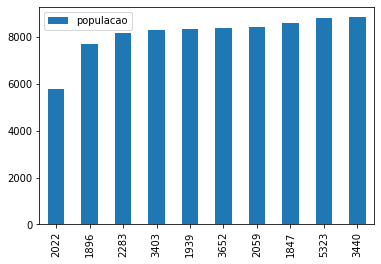

In [43]:
# código para gerar a visualização

menores_cidades = filtro_populacao.sort_values(by=['populacao'])
cidades_pequenas = menores_cidades.head(n=10)
cidades_pequenas

cidades_pequenas.plot.bar(y='populacao')

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

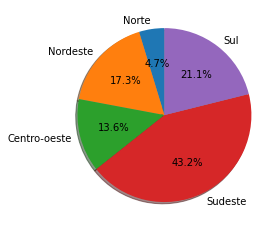

In [62]:
# código para gerar a visualização
import matplotlib.pyplot as plt

filtro_regiao = brasil_df.loc[brasil_df['regiao']=='SUL']
populacao_sul = filtro_regiao['populacao'].agg('sum')

filtro_regiao = brasil_df.loc[brasil_df['regiao']=='SUDESTE']
populacao_sudeste = filtro_regiao['populacao'].agg('sum')

filtro_regiao = brasil_df.loc[brasil_df['regiao']=='CENTRO-OESTE']
populacao_coe = filtro_regiao['populacao'].agg('sum')

filtro_regiao = brasil_df.loc[brasil_df['regiao']=='NORTE']
populacao_norte = filtro_regiao['populacao'].agg('sum')

filtro_regiao = brasil_df.loc[brasil_df['regiao']=='NORDESTE']
populacao_ne = filtro_regiao['populacao'].agg('sum')

labels = 'Norte','Nordeste','Centro-oeste','Sudeste','Sul'
sizes = [populacao_norte,populacao_ne,populacao_coe,populacao_sudeste,populacao_sul]
figl,axl = plt.subplots()
axl.pie(sizes,labels=labels,autopct='%1.1f%%',
        shadow=True,startangle=90)
axl.axis=('equal')
plt.show()

